# Introduction:
* Principal Component Analysis (PCA) --Unsupervised, liner method
* Linear Discriminant Analysis (LDA) --Supervised, liner method
* t-distributed Stochastic Neighbour Embedding (t-SNE) --Nonlinear, probabilstic method

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# MNIST Dataset

In [3]:
train = pd.read_csv('../input/train.csv')
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
print(train.shape)

(42000, 785)


### Pearson Correlation Plot(威尔逊相关系数)

In [5]:
# 先把标签数据从数据库中分离出来
target = train['label']
train = train.drop("label", axis=1)

## 1. PCA

### Calculating the Eigenvectors

In [6]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [7]:
# Calculating Eigenvectors and eigenvalues of Cov matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
             for i in range(len(eig_vals))]

In [8]:
# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Calculation of Explained Variance(可解释方差) from the eigenvalues
tot = sum(eig_vals)
# Individual explanined variance(个体可解释方差)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
# (累积可解释方差)
cum_var_exp = np.cumsum(var_exp)

In [9]:
# Use Plotly visualisation package 
# To produce an interactive chart (互动图)
trace1 = go.Scatter(
    x = list(range(784)), # 28*28
    y = cum_var_exp,
    mode = 'lines+markers',
    name = "'Comulative Explained Variance'",
    # hoverinfo = cum_var_exp,
    line = dict(
        shape = 'spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x = list(range(784)),
    y = var_exp,
    mode = 'lines+markers',
    name = "'Individual Explanined Variance'",
    # hoverinfo = cum_var_exp,
    line = dict(
        shape = 'linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l':0.7, 'b':0.5}],print_grid=True)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title='Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title='Explained Variance')

py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



上图累计解释方差图可知874个数据，利用其中的200个数据便构成了90%的累积方差。所以在特征降维的过程中，只提取得到该200个特征便可以一定程度上替代整个样本。

## Visualizing the Eigenvalues

采用了sklearn从dataset中提取30 eigenvalues，并且可视化比较最高的28个eigenvalues 

In [10]:
# Invoke Sklearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extract the PCA components (eigenvalues)
eigenvalues = pca.components_

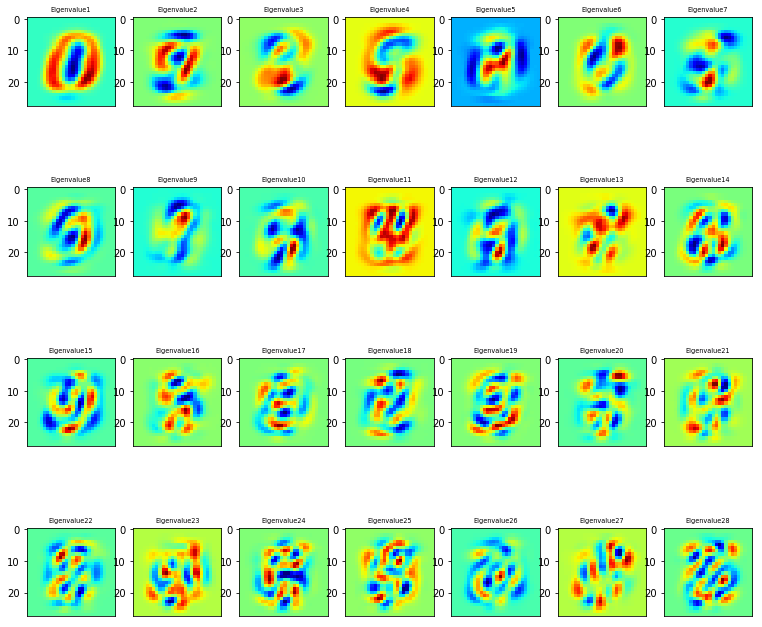

In [11]:
n_rows = 4
n_col = 7

# Plot the first 28 eigenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_rows * n_col)):
    offset = 0
    plt.subplot(n_rows, n_col, i+1)
    plt.imshow(eigenvalues[i].reshape(28, 28), cmap='jet')
    title_text = 'Eigenvalue' + str(i+1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.xticks(())
plt.show()

从上图可知，特征图的方向演变越来越复杂，以拓展特征空间，扩大特征方差。

## Visualsing the MNIST Digit set on its own

展示实际基础数据集数据

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



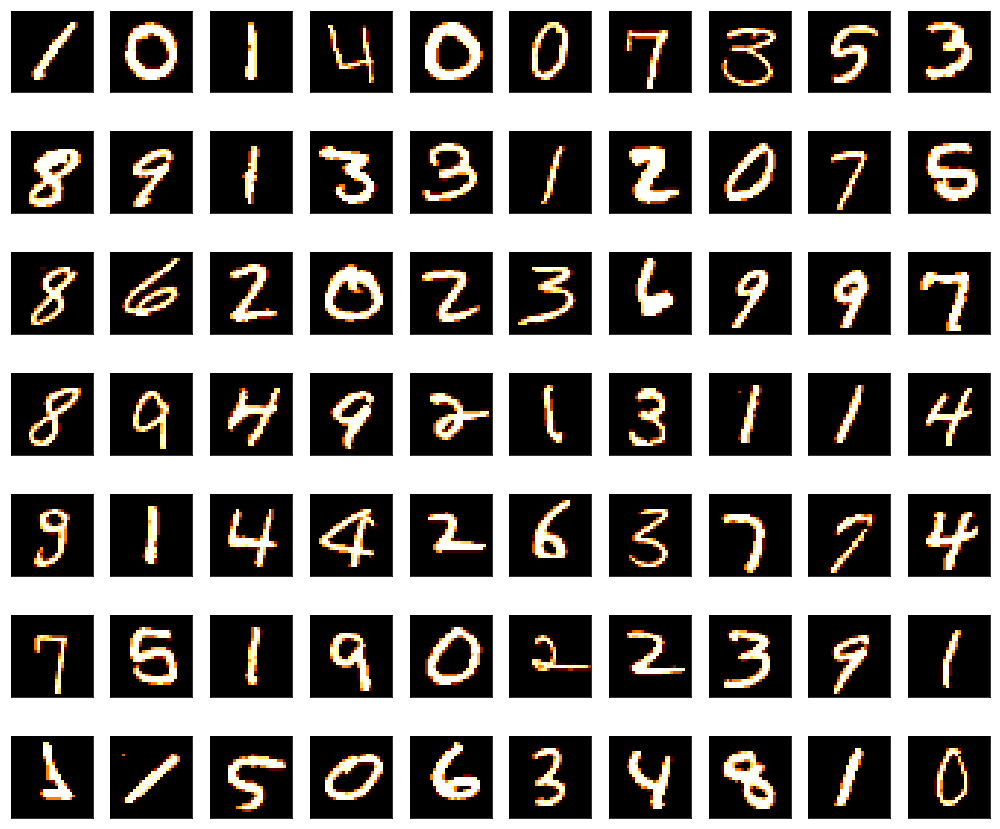

In [12]:
# plot some of the numbers
plt.figure(figsize=(14, 12))
for digit_num in range(0, 70):
    plt.subplot(7, 10, digit_num+1)
    # reshape from 1d to 2d pixel array
    grid_data = train.iloc[digit_num].as_matrix().reshape(28, 28)
    plt.imshow(grid_data, interpolation="none", cmap='afmhot')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## PCA Implementation via Sklearn

PCA聚类的关键在于如何选取聚类的components，具体可参考论文，这里选取为5

In [13]:
# Delete our earlier created X object
del X
# Taking only the first N rows to speed things up
X = train[:6000].values
del train
# Standardsing the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components.
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values
Target = target[:6000]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



## Interactive visualisations of PCA representation

这里只显示前两主成分投影

In [14]:
trace0 = go.Scatter(
    x = X_5d[:, 0],
    y = X_5d[:, 1],
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale = 'Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title = 'Principal Component Analysis (PCA)',
    hovermode = 'closest',
    xaxis = dict(
        title = 'First Principal Component',
        ticklen = 5,
        zeroline = False,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = 'Second Principal Component',
        ticklen = 5,
        gridwidth = 2,
    ),
    showlegend = True,
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

PCA属于非监督学习，类别信息是外加的，可以看到类别的分类情况不是特别好

## K-Means Clustering to identify possible classes

K-Means可用于PCA非监督学习中的聚类分析，通过点云集中心之间的距离来进行分类
这里显示前两主成分投影的聚类分析结果

In [15]:
from sklearn.cluster import KMeans # KMeans clustering
# KMeans 中K设置为9
kmeans = KMeans(n_clusters=9)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_5d)

trace_Kmeans = go.Scatter(x=X_5d[:, 0], y=X_5d[:, 1], mode="markers",
                         showlegend=False,
                         marker=dict(
                             size = 8,
                             color = X_clustered,
                             colorscale = 'Portland',
                             showscale = False,
                             line = dict(
                                 width = 2,
                                 color = 'rgb(255, 255, 255)'
                             )
                         ))

layout = go.Layout(
    title = 'KMeans Clustering',
    hovermode = 'closest',
    xaxis = dict(
        title = 'First Principal Component',
        ticklen = 5,
        zeroline = False,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = 'Second Principal Component',
        ticklen = 5,
        gridwidth = 2,
    ),
    showlegend = True
)

data = [trace_Kmeans]
fig1 = dict(data=data, layout = layout)
py.iplot(fig1, filename='svm')

和之前PCA的图相比较可见非监督学习的分类效果不是很好，两者一致性较低

# 2. Linear Discriminant Analysis (LDA)

LDA的原理在于最大化类间方差，最小化类内方差，可通过散度矩阵进行表达求解

## LDA Implementation via Sklearn
LDA model，仍采用5维度

In [16]:
lda = LDA(n_components=5)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_std, Target.values)

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



## Interactive visualisations of LDA representation

In [17]:
# Using the Plotly library again
traceLDA = go.Scatter(
    x = X_LDA_2D[:, 0],
    y = X_LDA_2D[:, 1],
    mode = 'markers',
    text = Target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = Target,
        colorscale = 'Jet',
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = go.Layout(
    title = 'Linear Discriminant Analysis (LDA)',
    hovermode = 'closest',
    xaxis = dict(
        title = 'First Linear Discriminant',
        ticklen = 5,
        zeroline = False,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = 'Second Linear Discriminant',
        ticklen = 5,
        gridwidth = 2,
    ),
    showlegend = False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

# 3. T-SNE(t-Distributed Stochastic Neighbour Embedding)

t分布以条件分布来解决分类问题

In [18]:
# Invoking the t-SNE method
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std)

In [19]:
traceTSNE = go.Scatter(
    x = tsne_results[:, 0],
    y = tsne_results[:, 1],
#    name = Target,
#    hoveron = Target,
    mode = 'markers',
    text = Target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = Target,
        colorscale = 'Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
             hovermode = 'closest',
             yaxis = dict(zeroline = False),
             xaxis = dict(zeroline = False),
             showlegend = False,
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

从图中可以看出TSNE算法的类间分离效果较好，优于之前的PCA和LDA算法，这要归结于算法的拓扑保留特性
TSNE算法的缺点在于可能存在多个局部最小值，图中可看出有相同颜色的子簇被分离到了两块不同的区域

# 4.总结

这里简单总结了几种常见的降维方法，包括：PCA（+KMeans），LDA，TSNE
还有一些其他的降维方案，包括：Sammon映射、多维缩放、以及一些基于图的可视化方法